In [122]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [123]:
def contoursConvexHull(contours):
    print("contours length = ", len(contours))
    print("contours length of first item = ", len(contours[1]))
    pts = []
    for i in range(0, len(contours)):
        for j in range(0, len(contours[i])):
            pts.append(contours[i][j])
    
    pts = np.array(pts)
    result = cv2.convexHull(pts, returnPoints = True)
    return result

In [124]:
image=cv2.imread("Center_1.jpg")

orig = image.copy()

#plt.imshow(image)

# convert the image to grayscale, blur it and find edges
height, width = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16,16))
#plt.imshow(gray, cmap='gray')

t, bw = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

opened=cv2.morphologyEx(bw,cv2.MORPH_OPEN, np.ones((9,9)))
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((11,11)))

edges = cv2.Canny(closed,255,255)

from scipy.spatial import ConvexHull

xs, ys = np.where(edges > 0)

edgePts = []
for i in range(0, len(xs)):
    edgePts.append([ys[i], xs[i]])
    
hull = cv2.convexHull(np.array(edgePts))

<Figure size 1152x1152 with 0 Axes>

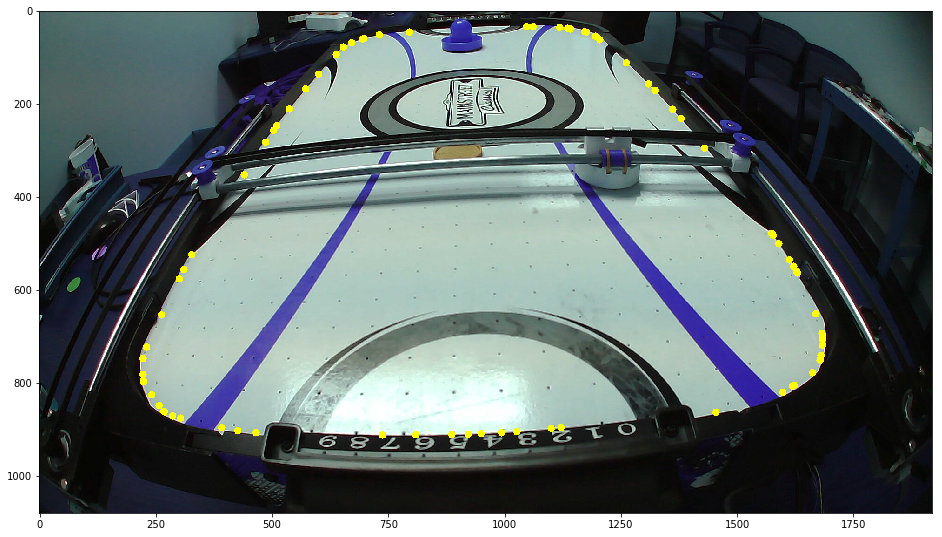

In [125]:
for i in range(0, len(cvHull)):
    cv2.circle(image, tuple(cvHull[i][0]), 8, (255, 255, 0), -1)
    
plt.figure(figsize=(16,16))
plt.imshow(image)

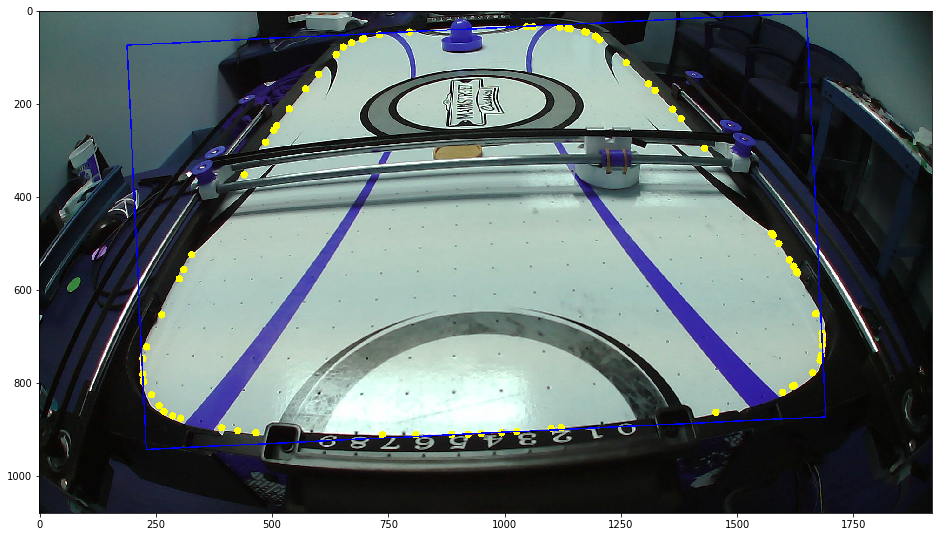

In [126]:
rect = cv2.minAreaRect(hull)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),2)

plt.figure(figsize=(16,16))
plt.imshow(image)

In [127]:
box

array([[ 230,  943],
       [ 189,   75],
       [1650,    6],
       [1691,  873]])

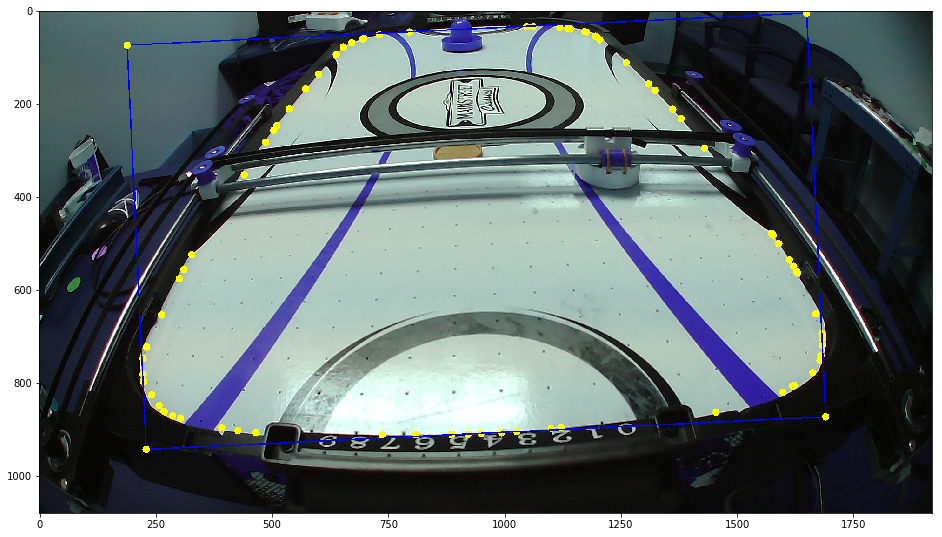

In [128]:
cv2.circle(image, tuple(box[0]), 8, (255, 255, 0), -1)
cv2.circle(image, tuple(box[1]), 8, (255, 255, 0), -1)
cv2.circle(image, tuple(box[2]), 8, (255, 255, 0), -1)
cv2.circle(image, tuple(box[3]), 8, (255, 255, 0), -1)

plt.figure(figsize=(16,16))
plt.imshow(image)

In [107]:
hullcp=hull.copy()
hullcp[4][0]

array([1663,  778], dtype=int32)

In [108]:
topLeft = None
topRight = None
botLeft = None
botRight = None

for i in range(0, len(hullcp)):
    if hullcp[i][0][1] < 60:
        if topRight is None:
            topRight = tuple(hullcp[i][0])
        else:
            if topRight[0] <= hullcp[i][0][0]:
                topRight = tuple(hullcp[i][0])
                
        if topLeft is None:
            topLeft = tuple(hullcp[i][0])
        else:
            if topLeft[0] >= hullcp[i][0][0]:
                topLeft = tuple(hullcp[i][0])
            

In [109]:
(topLeft, topRight)

((731, 53), (1198, 57))

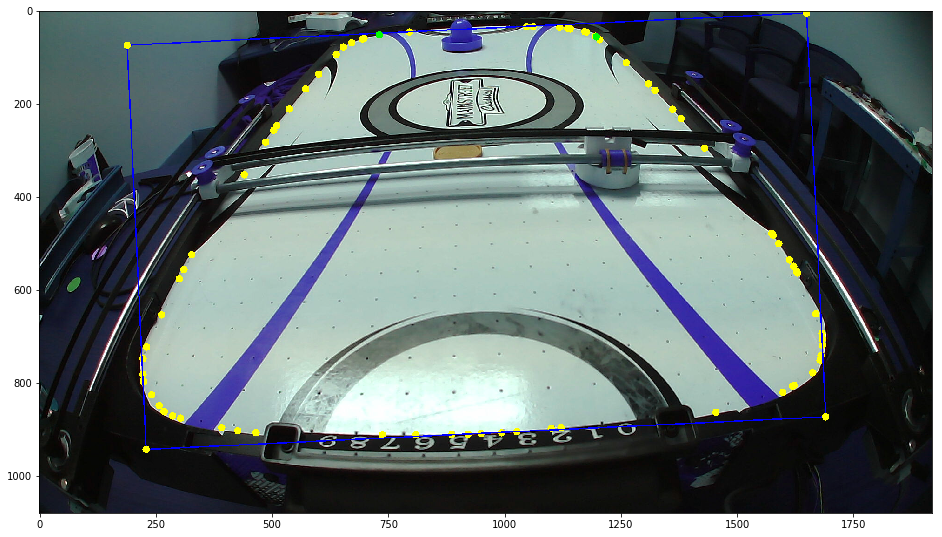

In [110]:
cv2.circle(image, topLeft, 8, (0, 255, 0), -1)
cv2.circle(image, topRight, 8, (0, 255, 0), -1)

plt.figure(figsize=(16,16))
plt.imshow(image)